In [1]:
# Tarea5

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

Sabemos que los exponenetes de Lyapunov están dados por las fórmulas:

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos
\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}

Así que necesitamos algunas herramientas que ya hemos desarrollado anteriormente para atacar este problema. 
Escribiré a continuación algunas funciones que ya utilicé en notebooks anteriores para empezar a explorar los exponentes $\lambda(x_0)$ de la familia de mapeos cuadráticos $Q_C(x)$.

In [2]:

using Plots, PlotRecipes
pyplot()
using LaTeXStrings;
using TaylorSeries



    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [3]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    push!(xvec,x)
    for i in 1:m
        x=f(x)
        if abs(x)<1e-10
            push!(xvec,0.0)
        else
        push!(xvec,x)
        end 
    end 
    return xvec
end 
        

iter_map (generic function with 1 method)

In [4]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) n: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(f,crange,n,x0,Nlast)
diagBif=Float64[]
cs=Float64[]
    for c in crange
        Q(x)=f(x,c)
        x=iter_map(Q,x0,n)
        for i in 0:Nlast
            push!(cs,c)
            bif=x[end-i]
            push!(diagBif,bif)
        end
    end
        return cs,diagBif   
end 

Bif_diag (generic function with 1 method)

In [5]:
"""Función que evalua el coeficiente de lyapunov de un mapeo f(x,c) a partir de una condición 
inicial x0, con n iterados. Observación: para que de una buena aproximación n tiene que ser 
grande.
En sus argumentos se debe incluir la función f y su derivada f'"""
function lyapunov(f,f´,x0,n)
    x=x0
    lyap=0
    for i in 1:n
        x=f(x)
        fpr=f´(x)
        aux=log(abs(fpr))
        lyap=lyap+aux
    end 
    lyap=(1/n)*lyap
    return lyap
end 
    

lyapunov (generic function with 1 method)

Dibujemos el diagrama de bifurcaciones para la familia de mapeos cuadráticos, iterando la condición inicial $x_0=0$:

In [6]:
ces=-2:1/2^10:0.25

-2.0:0.0009765625:0.25

In [7]:
Qc(x,c)=x^2+c
Qc´(x)=2x

Qc´ (generic function with 1 method)

In [8]:
x0=0.01
n=10000
Nlast=500;

In [9]:
cs,diagBif=Bif_diag(Qc,ces,n,x0,Nlast);

[Plots.jl] Initializing backend: pyplot



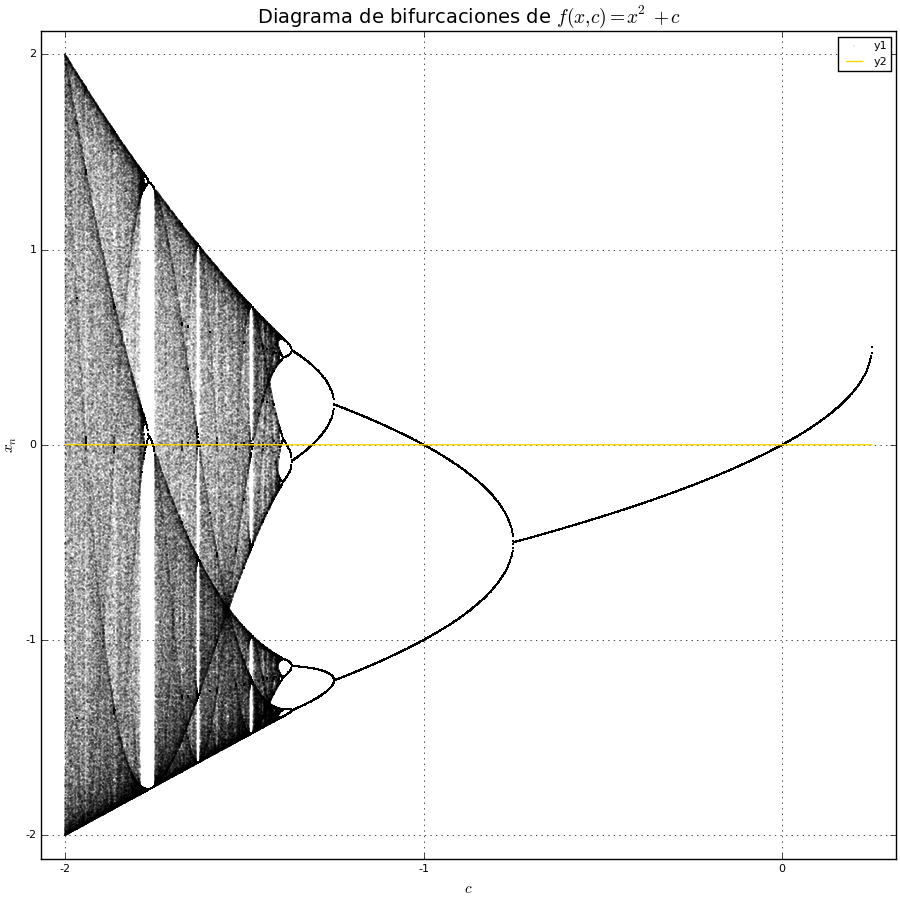

In [10]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")



In [11]:
"""esta función calcula la longitud de la orbita de la iteración de f(x,c) a partir de una 
condición inicial x0 y un parámetro c. La función itera n veces la condicion inicial y 
a partir de ahí ve los valores distintos de las x_{n+i} para determinar la longitud de la 
orbita.
"""
function orbit_length(f,x0,c,n)
    G(x)=f(x,c)
    x=x0
    tol=1e-8
    cont=1
    for i in 1:n
        x=G(x)
    end 
    xf=x
    xorbit=G(xf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        xorbit=G(xorbit)   
        if cont>6*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
      

orbit_length (generic function with 1 method)

In [12]:
"""funcion que determina (si es que existe) el punto de bifurcación de un mapeo Qc(x,c)
entre dos valores de
parámetro c1 y c2 con Norb iteraciones a partir de la condicion inicial x0
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Cb' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bif(Qc,c1,c2,x0,Norb)
L1=orbit_length(Qc,x0,c1,Norb)
L2=orbit_length(Qc,x0,c2,Norb)
tol=1e-12
    if (L1-L2)==0
        nothing
    else
     while abs(c1-c2)>tol
        cmed=(c1+c2)/2
        Lmed=orbit_length(Qc,x0,cmed,Norb)
        if Lmed==L1
            c1=cmed
            L1=orbit_length(Qc,x0,c1,Norb)
        else Lmed==L2
            c2=cmed
            L2=orbit_length(Qc,x0,c2,Norb)
        end  
        end
    end 
    cb=(c1+c2)/2
    return cb
    
end 

point_bif (generic function with 1 method)

In [13]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end


fn_ratio (generic function with 1 method)

Iteramos todos los parámetros $c$ del rango dado en 'ces=-2:1/2^10:0.25', para poder graficar los valores calculados de los exponentes de Lyapunov en el intervalo $c\in(-2,0.25)$

In [14]:
lyaps=Float64[]
for c in ces
    f(x)=Qc(x,c)
    L=lyapunov(f,Qc´,0.01,10000)
    push!(lyaps,L)
end 


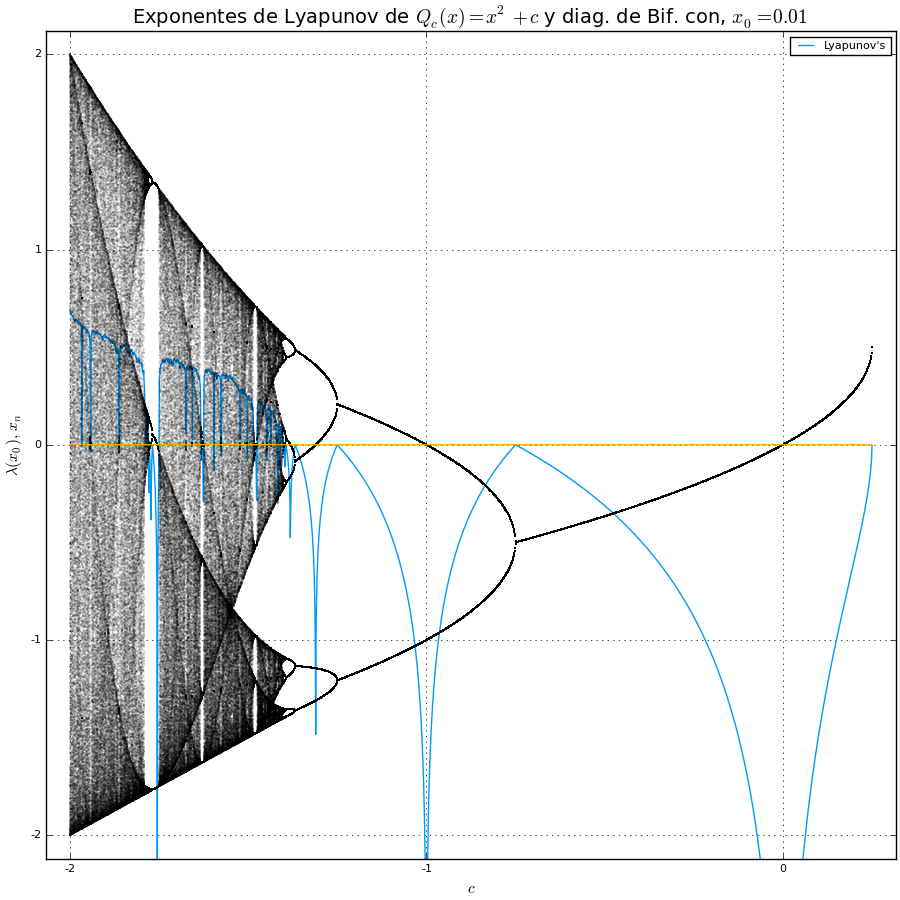

In [15]:
plot(ces,lyaps,label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.05,size=(900,900),label="")
title!(L"Exponentes de Lyapunov de $Q_c(x)=x^2+c$ y diag. de Bif. con, $x_0=0.01$ ",ylim=(-2,2))
xlabel!(L"c")
ylabel!(L"\lambda(x_0), \ x_n")
plot!(ces,zeros(length(ces)),c=:orange,label="")

Haciendo un zoom:


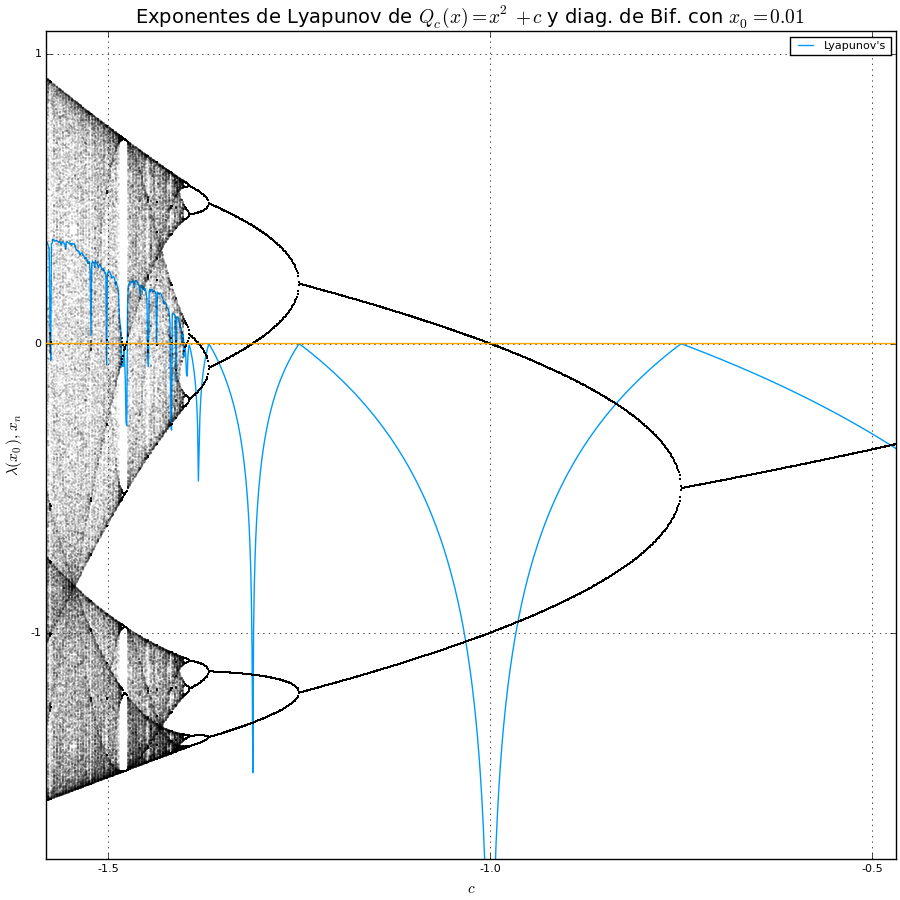

In [16]:
plot(ces,lyaps,xlim=(-1.55,-0.5),ylim=(-1.7,1),label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.05,size=(900,900),label="")
title!(L"Exponentes de Lyapunov de $Q_c(x)=x^2+c$ y diag. de Bif. con $x_0=0.01$ ")
xlabel!(L"c")
ylabel!(L"\lambda(x_0), \ x_n")
plot!(ces,zeros(length(ces)),c=:orange,label="")

Si observamos la recta $f(c)=0$ notamos que **en los puntos en donde ocurren las bifurcaciones, los valores de los exponentes de Lyapunov son cero**. (Esto contesta la primera pregunta).

Recordemos también que se dice que **existe caos** cuando los exponentes de Lyapunov son positivos mientras que **no existe caos** cuando los exponentes de Lyapunov son negativos.
Con este reocrdatorio, notemos  también que **existe un valor de *c* ** que divide los mapeos para los cuales emipieza a existir caos. Es dceir que $\exists \ c_{ch}$ tal que para $c\geq c_{ch}$ los mapeos $Q_c(x)$ no presentan caos, mientras que para $c\leq c_{ch}$ puede exstir caos.

Haciendo de nuevo un zoom se puede decir que el valor de $c_{ch}$ está cercano a  $-1.4$.


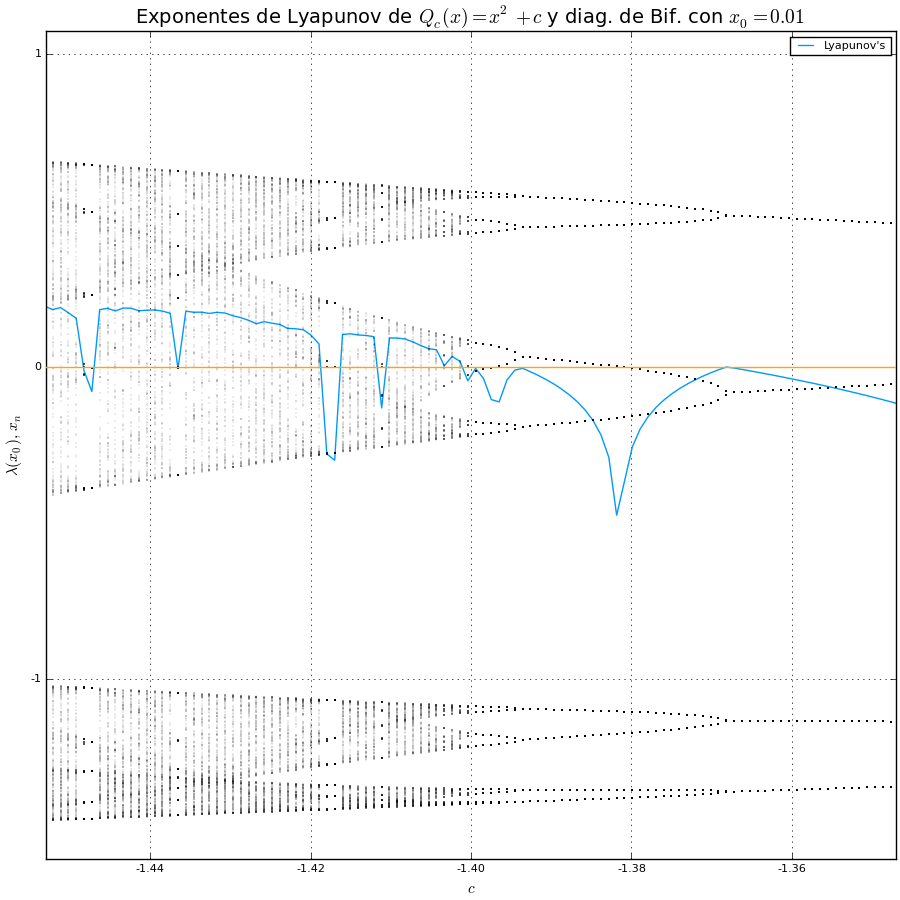

In [17]:
plot(ces,lyaps,xlim=(-1.45,-1.35),ylim=(-1.5,1),label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.05,size=(900,900),label="")
title!(L"Exponentes de Lyapunov de $Q_c(x)=x^2+c$ y diag. de Bif. con $x_0=0.01$ ")
xlabel!(L"c")
ylabel!(L"\lambda(x_0), \ x_n")
plot!(ces,zeros(length(ces)),c=:orange,label="")

Para contestar a la segunda pregunta, notemos que si $x=0$ es parte de una órbita periódica entonces $Q´_c(x=0)=2(0)=0$. Por lo tanto el producto 

\begin{equation}
\prod_{i=1}^{n} f'(x_i)=0
\end{equation}

y por tanto 
\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \prod_{i=1}^{n} f'(x_i)\Big| \rightarrow -\infty,
\end{equation}

Este comportamiento se observa en los "picos" del diagrama de los exponentes de Lyapunov que mostré anteriormente.

Por lo tanto, **en ciclos superestables**, los exponentes de Lyapunov tienden a $-\infty$ para la familia de mapeos cuadráticos $Q_c(x)=x^2+c$.

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.)

Si queremos que $x_0=0$ sea parte de la órbita de periodo $n$, se debe satisfacer que dicho punto sea un punto fijo del mapeo $Q^n_c(x)$. 
Por lo tanto encontrar los puntos superestables se traduce a encontrar las soluciones de

$$Q^n_c(x=0)=0$$

Por ejemplo para n=1, se tiene que 
$$Q_c(x=0)=0 \iff c=0$$

para n=2, se tiene que 

$$Q_c^2(x=0)=(0+c)^2+c=0 \iff c^2+c=0 \iff c(c+1)=0 $$


Por tanto el segundo ciclo super estable se tiene cuando $$ c=-1$$.

Así sucesivamente para toda $n$.

Usemos las funciones definidas por Luis en el [notebook 9](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/09_Mapeos1d-4.ipynb) de notas de clase, para calcular las raíces de $Q_c^n$.

Usemos las funciones definidas por Luis en el notebook 9 de notas de clase, para calcular las raíces de $Q_c^n$.

In [18]:
"""
    Qcⁿ(x, c,n)

Esta función define el n-enésimo iterado de Qc(x,c),
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x,c,n)
    #c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [19]:
"""método de Taylor para encontrar las raíces de una función f(x) a partir de una estimación
inicial x0"""
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:100
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

La siguiente función calcula toads las posibles raíces reales de los mapeos $Q_c^i$ con $i=1,...2n$ y los devuelve en un  arreglo 'Cn'. Este arreglo corresponde entonces a los parámetros $c$ para los caules se tienen ciclos superestables.

In [20]:
"""funcion que quita los valores repetidos en un arreglo de entrada """
function clean(arr)
    bifsclean=Float64[]
    tol=1e-8
    eq=arr[1]
    push!(bifsclean,eq)
    for i in 1:length(arr)-1
        if abs(arr[i+1]-arr[i])<tol
            nothing
        else 
            eq=arr[i+1]
            push!(bifsclean,eq)
        end
    end 
    return bifsclean
end 

clean (generic function with 1 method)

In [21]:
"""Función que encuentra los parametros Cn que corresponden a ciclos super estables
Los parámetros de entrada son 
n=numero de parámetros que se desean encontrar"""
function superstable_Qcmap(n)
    Cn=Float64[]
    crange=0.1:-0.001:-1.401 #rango de estimaciones iniciales para el método de newton
    for i in 1:n
        Qn(c)=Qcⁿ(0,c,2*i)
        for x0 in crange
            Sspoint=roots_newton(Qn,x0)
            if Sspoint>-1.401 && Sspoint<=0 #stopping rule
            push!(Cn,Sspoint)
            else 
                nothing
            end 
        end 
    end 
    a=sort(Cn)
    Cn=clean(a)
    return Cn
end 
        
    

superstable_Qcmap (generic function with 1 method)

In [22]:
Cn=superstable_Qcmap(32);


In [23]:
reord=zeros(length(Cn))
[ reord[i+1]=Cn[end-i] for i in 0:length(Cn)-1]
[println(reord[i]) for i in 1:length(Cn)];

0.0
-1.0
-1.310702641336833
-1.3815474844320617
-1.396945359704561
-1.400253081214783
-1.4009619629448422


**Este último arreglo corresponde a los parámetros $C_n$ en donde se tienen órbitas super estables**

Calculemos el parámetro

$$a_n = \frac{d_n}{d_{n+1}}$$

En donde $d_n$ se define como la mínima distancia del punto de la órbita generada a partir de la iteración del mapeo 

$$Q_{C_n}(x)=x^2+C_n$$

con $C_n$ los parámetros que dan las órbitas super estables.
Para encontrar $d_n$ iteramos $Norb=10,000$ el mapeo $Q_{C_n}$ y a partir de ahi guardamos los valores de los iterados $x_m$ con $m\geq Norb$ y tomamos el mínimo de  tales $|x_m|$ 

In [24]:
"""función que determina las distancias d_n del mapeo cuadrático a partir de 
la condición inicial x0=0 utilizando los parámetros de super estabilidad del arreglo Cn"""
function dn(Norb,Cn)
       dn1=Float64[0]
    di=1
    for i in 2:length(reord)
        f(x)=Qc(x,reord[i])
        x0=0.
        m=15000
        xx=iter_map(f, x0, m)
        dist=Float64[]
        for i in 0:63
            push!(dist,xx[end-i])
        end 
    a=abs(dist)
    a=clean(sort(a))
    di=a[2]
    push!(dn1,di)
    end
    return dn1
end 
            

dn (generic function with 1 method)

In [25]:
d_n=dn(15000,reord)

7-element Array{Float64,1}:
 0.0      
 1.0      
 0.407239 
 0.163425 
 0.0653634
 0.0261213
 0.0104369

Con estas distancias mínimas, calculemos la segunda constante de Feigenbaum

In [26]:
α=1
for i in 1:length(d_n)-1
    α=d_n[i]/d_n[i+1]
    println(α)
end 

0.0
2.455561864707475
2.4918945698987063
2.500259001953708
2.5023054105262728
2.5027742269111797


Vemos que $\alpha$ tiende al valor 

$$\alpha =2.502 774 226 911 179 $$

Comparándolo con el valor de [Wikipedia](https://en.wikipedia.org/wiki/Feigenbaum_constants#The_second_constant) dado por

$$\alpha_{wiki} = 2.502 907 875 095$$

podemos decir que los métodos implementados funcionan bien para encontrar la segunda constante de Feigenbaum.

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


In [27]:
c=[1/4,0,-3/4,-1,-2,-2.2]
c´=[-3/4,-1,-5/4,-1.3,-1.546,-1.65]
qc(x)=Qcⁿ(x,c[1],1)
qc²(x)=Qcⁿ(x,c´[1],2)


qc² (generic function with 1 method)

In [28]:
plots=[]
xrange=-2:1/2^8:2
colors=[:purple,:royalblue,:green,:red,:gold,:pink]
for i in 1:length(c)
    qc(x)=Qcⁿ(x,c[i],1)
    p=plot(xrange,qc,title=L"$Q_c(x)=x^2+c,\ c=$"*"$(c[i])",label="",xlabel=L"x",c=colors[i])
    plot!(xrange,identity,label="",c=:skyblue)
    push!(plots,p)
end 


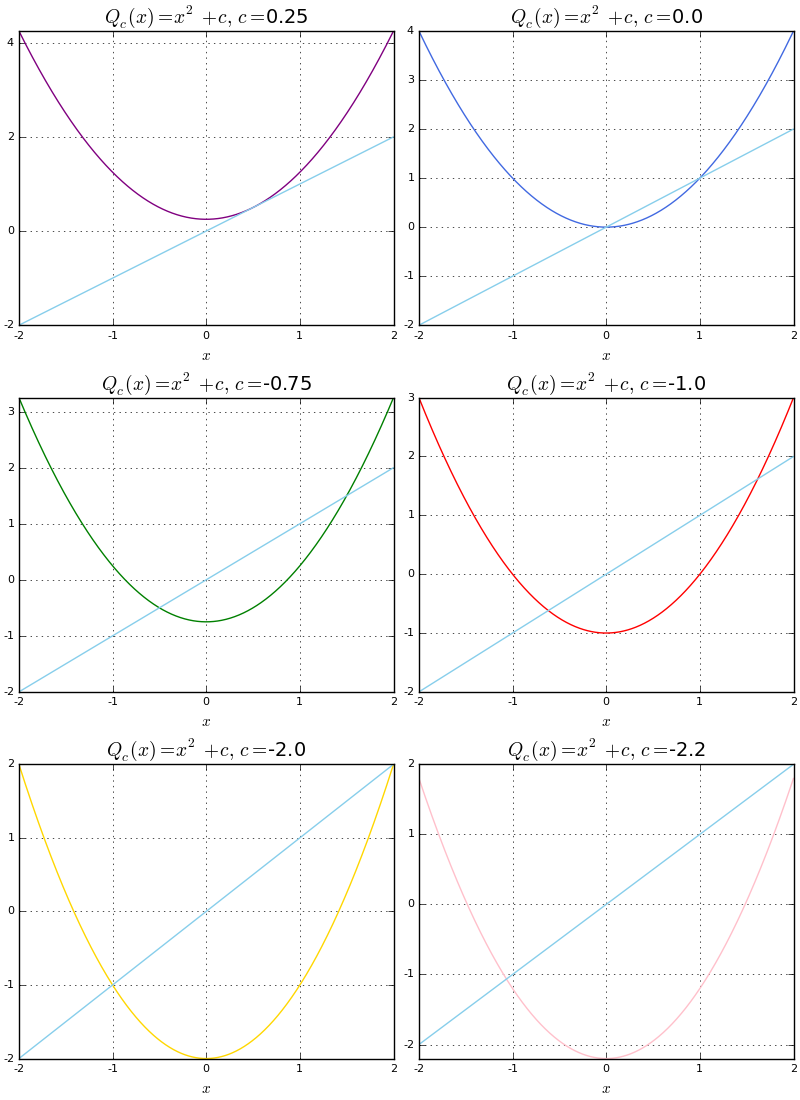

In [29]:
plot(plots...,layout=@layout([a1 b ;d e; f a3 ]),size=(800,1100))

In [30]:
plots=[]
xrange=-2:1/2^8:2
colors=[:purple,:royalblue,:green,:red,:gold,:pink]
for i in 1:length(c´)
    qc(x)=Qcⁿ(x,c´[i],2)
    p=plot(xrange,qc,title=L"$Q_c^2(x)=(x^2+c)^2+c,\ c=$"*"$(c´[i])",label="",xlabel=L"x",
    c=colors[i],ylim=(-2,2))
    plot!(xrange,identity,label="",c=:skyblue)
    push!(plots,p)
end 


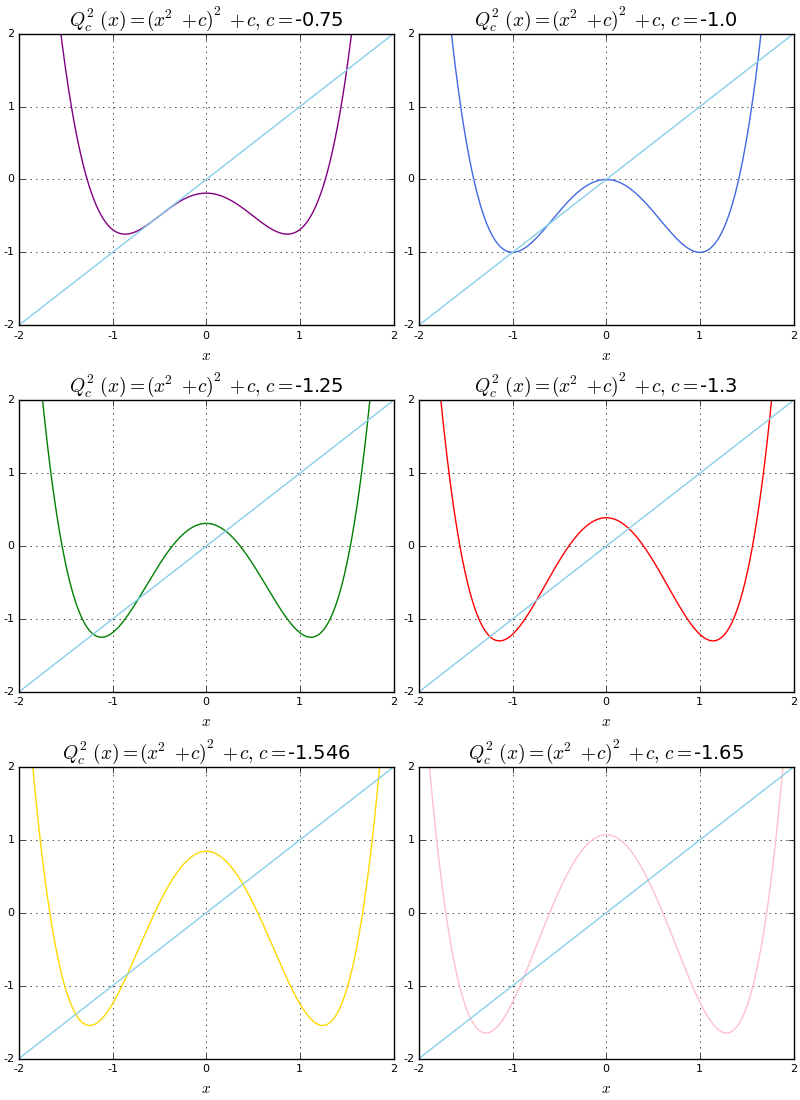

In [31]:
plot(plots...,layout=@layout([a1 b ;d e; f g ]),size=(800,1100))

Se observa que a medida que los parámetros $c$ disminuyen, aparecen puntos fijos en los mapeos $Q_c$ y $Q_c^2$. En el primer caso se pasa de tener solo una intersección con la identidad (ie, un punto fijo) a dos puntos fijos, y en el caso de $Q_c^2$ se pasa de tener dos puntos fijos a 4 puntos fijos, por lo que debe existir algún $c_{bif}$ y un $c´_{bif}$ que son los puntos de bifurcación de los mapeos.

**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

In [32]:
Q4(x)=Qc(x,-2.2)

Q4 (generic function with 1 method)


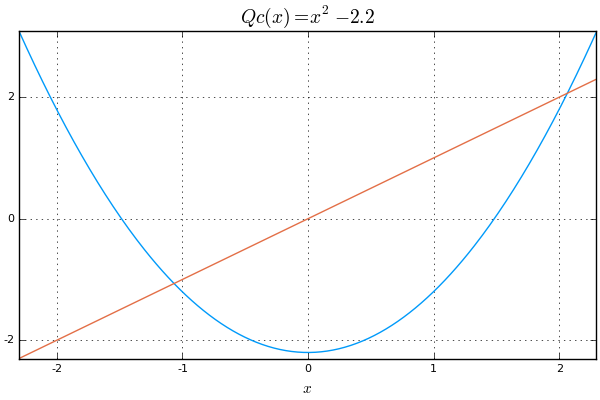

In [33]:
xrange=-2.3:1/2^6:2.3
plot(xrange,Q4,label="",xlabel=L"x",title=L"Qc(x)=x^2-2.2")
plot!(xrange,identity,label="")

De la gráfica anterior vemos que el mapeo tiene dos puntos fijos que corresponden a las soluciones de 
$$x^2-x-2.2=0$$


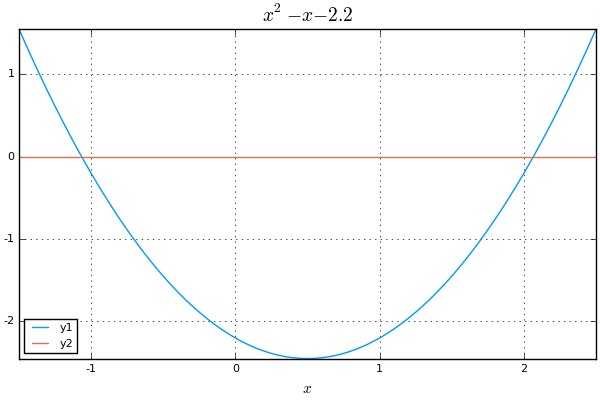

In [34]:
faux(x)=Q4(x)-x
plot(-1.5:1/2^6:2.5,faux,title=L"x^2-x-2.2",xlabel=L"x")
plot!(-1.5:1/2^6:2.5,zeros(length(-1.5:1/2^6:2.5)))


In [35]:
fix1=roots_newton(faux,-1.)
fix2=roots_newton(faux,2.)
fix1,fix2

(-1.0652475842498528,2.0652475842498528)

'fix1' y 'fix2' corresponden a los puntos fijos del mapeo cuadrático con $c=-2.2$
Debido a que  $Q´_c(x)=2x$, vemos que evaluada en los dos puntos fijos $|Q´(x^*)|\geq1$, por lo que ambos son repulsores y así el intervalo interesante de estudio es de todas las condiciones iniciales $x_0$ tales que 

$$x_0 \in (x_1^*,x_2^*)$$ 

en donde $x_1^*\approx -1.0652475842498528$ y $x_2^*\approx 2.0652475842498528$, de acuerdo lo encontrado utilizando la función usada 'roots_newton'.

Por lo tanto el intervalo en el que trabajaremos para responder a las presguntas del ejercicio es 

$$I=[p_{\_},p_+]=[-x_2^*,x_2^*]$$



In [36]:
range=-fix2:fix2/2^8:fix2; #difinimos un rango de condiciones iniciales en el intervalo que 
#estamos interesasados

-2.0652475842498528:0.008067373375975987:2.0652475842498528

La siguiente celda itera $n$ veces cada punto del rango de condiciones iniciales con $n=1,2,...10$

In [37]:
"""celda que itera n=1,2,...10 veces al mapeo en el intervalo I, y devuelve un arreglo con graficas 
para cada n y también devuelve una matriz cuyo n-ésimo renglón contiene el valor x_n=Qcⁿ(x_α) con 
x_α elemento del rango definido anterioremente.
"""
m=10
XN=zeros(m+1,length(range))
figures=[]
for j in 1:m
    iterates=zeros(j+1,length(range))
    for i in 1:length(range)
        x0=range[i]
        xx=iter_map(Q4,x0,j)
        iterates[:,i]=xx
    end 
    ends=Float64[]
    [push!(ends,iterates[end,i] ) for i in 1:length(range)]
    XN[j,:]=ends
    fig=plot(range,abs(ends),label=L"n="*"$j",yaxis=(:log10),xlabel=L"x_0",ylabel=L"log_{10}(x_n)")
    push!(figures,fig)
end 


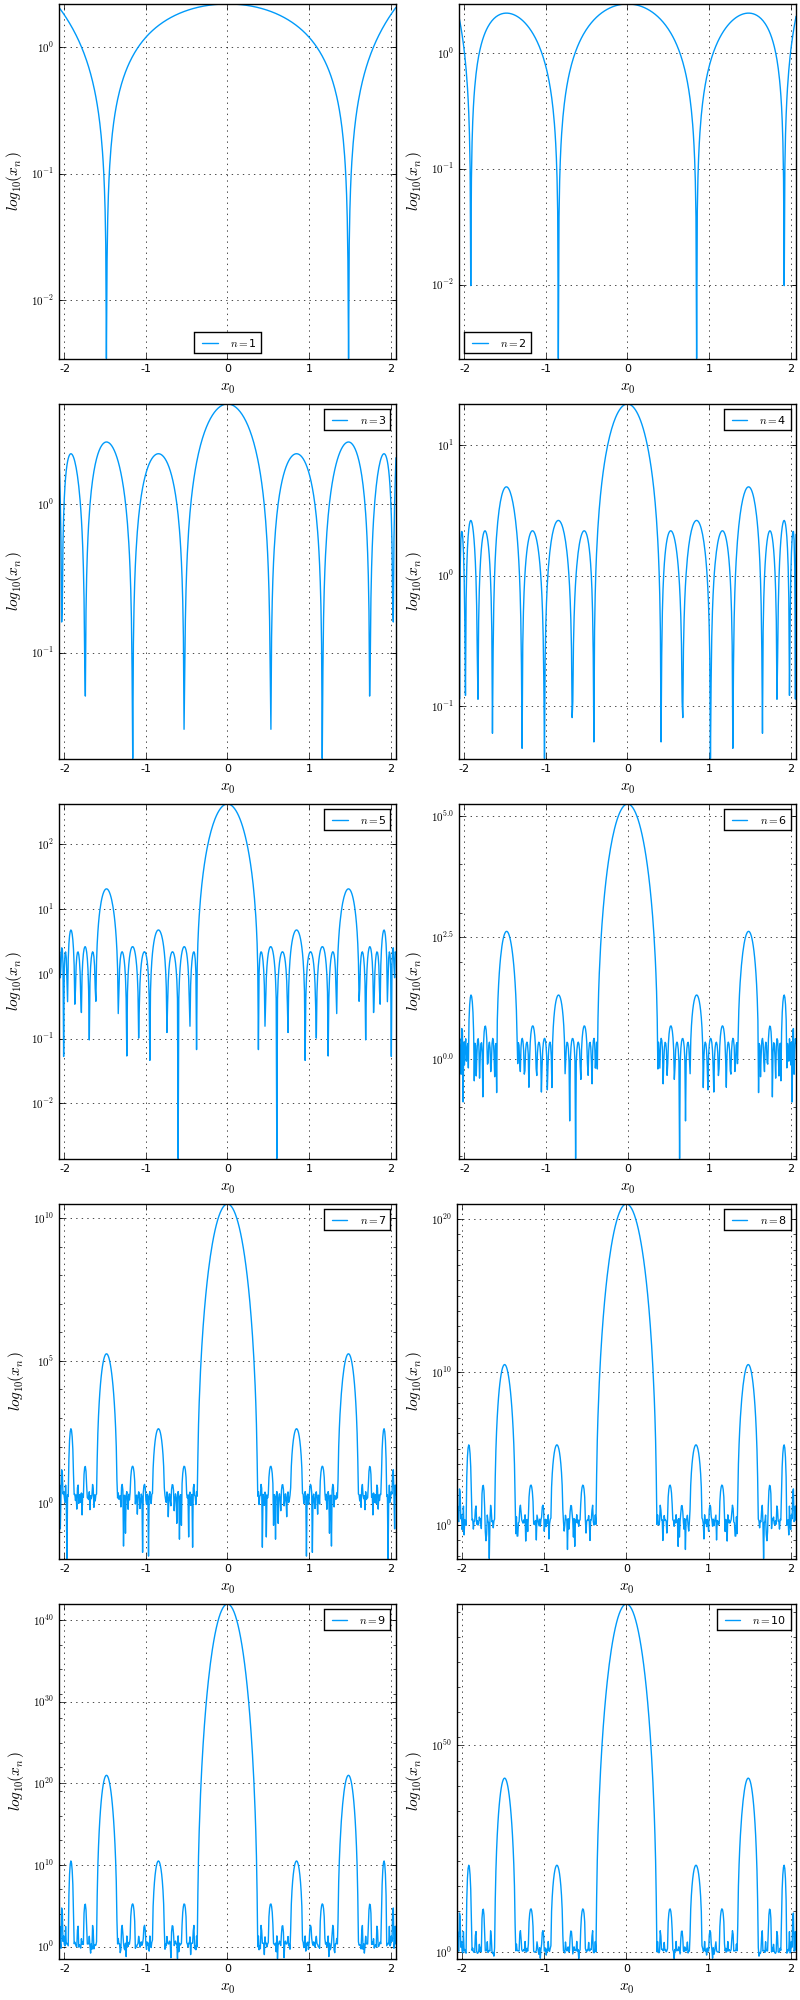

In [38]:
plot(figures...,size=(800,2000),layout=@layout([a b; c d;  e f; g h; i j]))

Las gráficas anteriores muestran el comportamiento de iterar $n$ veces el mapeo con $c=-2.2$. Como podemos observar a medida que n crece, rápidamente las condiciones inciales explotan y el iterado $x_n \rightarrow \infty $.

El interés está en caracterizar los subconjuntos del intervalo que después de $n$ iteraciones quedan contenidos en el mismo intervalo. Para ello tomamos la matriz XN cyuo elemento $XN_{n,\alpha }$ es el punto $x_n=Q_c^n(x_{\alpha })$ para cada $\alpha \in $ 'range'. 


En la  siguiente celda definimos dos matrices de ceros, del mismo tamaño que XN, llamadas $IN=$'subsetsIN_XN' y $OUT=$'subsetsOUT_XN'. 

Luego, tomamos cada renglón de la matriz XN y vemos si cada elemento del renglon n-ésimo ($n=1,2...10$) está contenido en I. Si el elemento $XN_{n,\alpha} \in I$ entonces hacemos al elemento $IN_{n,\alpha}=n$. En caso contrario $OUT_{n,\alpha}=n$. 

Así la matriz $IN$ contiene la información de los subconjuntos de $I$ que despues de $n$ iterados, están contenidos en $I$ y la matriz $OUT$ tiene la información de los subconjutos de $I$ que después de $n$ iterados  están fuera de $I$.

In [39]:
size(XN)

(11,513)

In [40]:
""""""
subsetsIN_XN=zeros(size(XN))
subsetsOUT_XN=zeros(size(XN))
plotsIN=[]
plotsOUT=[]
for n in 1:m+1
    for i in 1:length(range)
        if abs(XN[n,i])>2.0652475842498528
            subsetsOUT_XN[n,i]=n
        elseif abs(XN[n,i])<=2.0652475842498528
            subsetsIN_XN[n,i]=n
        else
        nothing    
        end
        
    end
end 


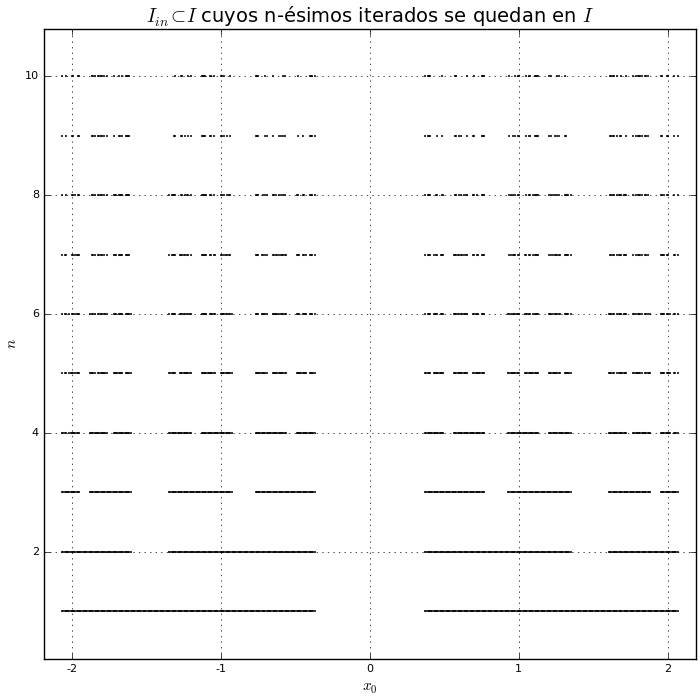

In [41]:
plt=zeros(length(range))
[plt[i]=subsetsIN_XN[1,i] for i in 1:length(range)]
scatter(range,plt,ylim=(0.5,10.5),ms=0.5,label="",size=(700,700))
for n in 2:m+1
    [plt[i]=subsetsIN_XN[n,i] for i in 1:length(range)]
    scatter!(range,plt,ms=0.5,label="")
end
xlabel!(L"x_0")
ylabel!(L"n")
title!(L"$I_{in}\subset I$ cuyos n-ésimos iterados se quedan en $I$ ")
scatter!()


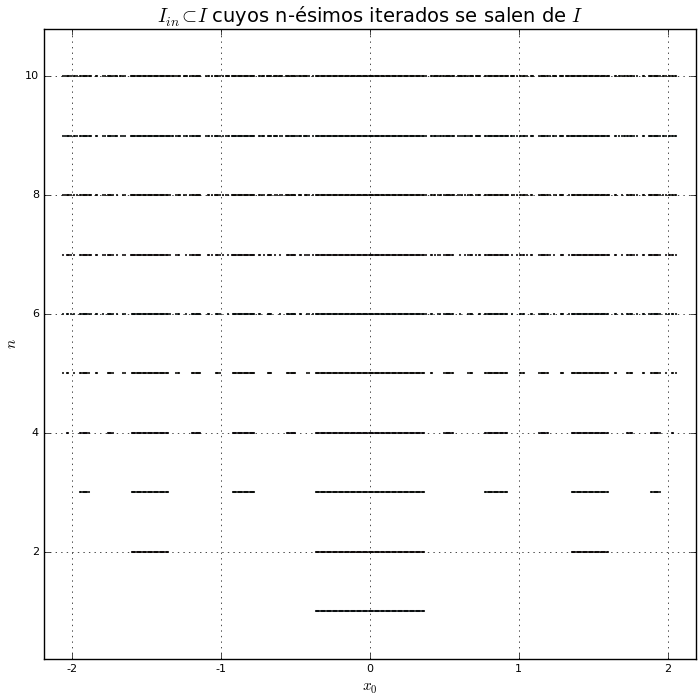

In [42]:
plt=zeros(length(range))
[plt[i]=subsetsOUT_XN[1,i] for i in 1:length(range)]
scatter(range,plt,ylim=(0.5,10.5),ms=0.5,label="",size=(700,700))
for n in 2:m+1
    [plt[i]=subsetsOUT_XN[n,i] for i in 1:length(range)]
    scatter!(range,plt,ms=0.5,label="")
end
xlabel!(L"x_0")
ylabel!(L"n")
title!(L"$I_{in}\subset I$ cuyos n-ésimos iterados se salen de $I$ ")
scatter!()

Claramente, los subconjuntos que se salen de $I$ después de $n$ iterados son el conjunto complemento de los subconjuntos que se salen de $I$ después de $n$ iterados.

Estas últimas dos gráficas nos recuerdan al **conjunto fractal de Cantor.**

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Liapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

Usemos la función definida casi al inicio de este notebook para buscar los parámetros $c$ en donde la orbita tiene periodo 3 y guadémoslo en un arreglo 'period'

In [43]:
crange=-2:1/2^10:0.25
period3=Float64[]
for s in crange
    periodo=orbit_length(Qc,0,s,100000) 
    if periodo==3
        push!(period3,s)
    else 
        nothing
    end 
end 

In [44]:
cbif=point_bif(Qc, -1.77, 1.755, 0., 100000)  #encontramos la bifurcacion de periodo 3 a 
#periodo 6

-1.76852359509712

In [45]:
period3

19-element Array{Float64,1}:
 -1.76758
 -1.7666 
 -1.76563
 -1.76465
 -1.76367
 -1.7627 
 -1.76172
 -1.76074
 -1.75977
 -1.75879
 -1.75781
 -1.75684
 -1.75586
 -1.75488
 -1.75391
 -1.75293
 -1.75195
 -1.75098
 -1.75   

Hagamos un zoom al diagrama de biburcaciones dfinido por los extremos del intervalo de párametros $c$ definido por el arreglo anterior:


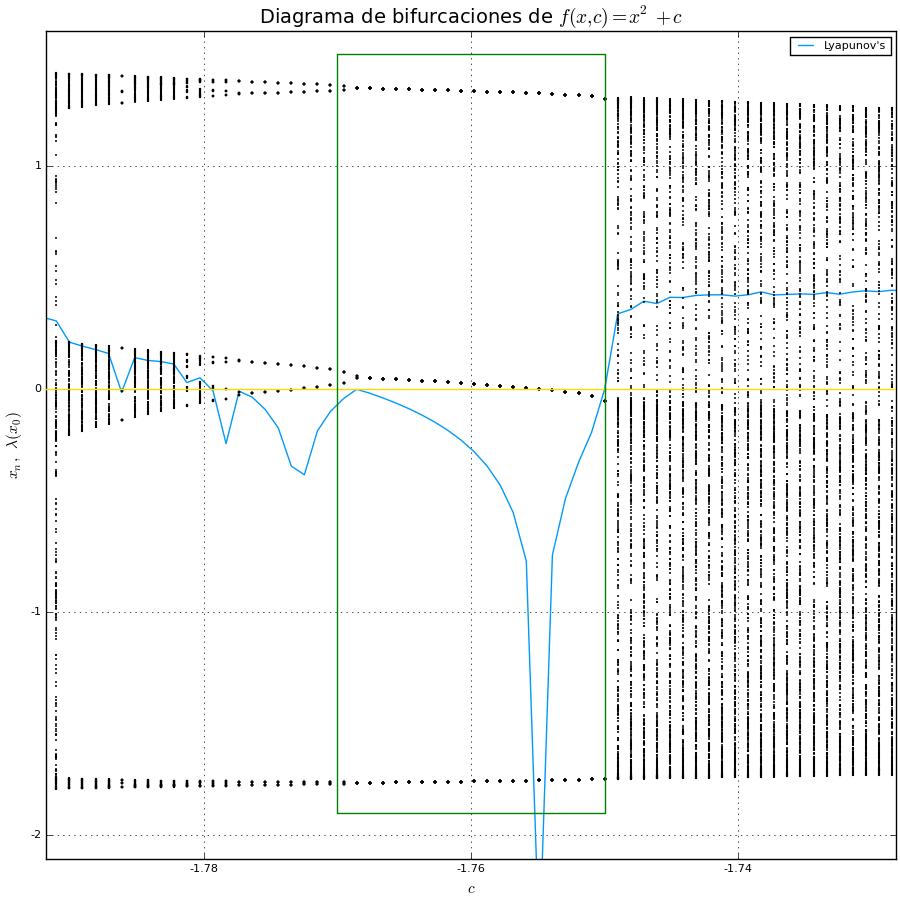

In [46]:
plot(ces,lyaps,label="Lyapunov's")
scatter!(cs,diagBif, markersize=0.5, xaxis=(L"c"),xlim=(-1.79,-1.73),ylim=(-2,1.5),
label="",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold,label="")
plot!([-1.77, -1.77, -1.75, -1.75,-1.77],[-1.9, 1.5, 1.5, -1.9,-1.9],c=:green,label="")
xlabel!(L"c")
ylabel!(L"x_n,\ \ \lambda (x_0)")



El recuadro verde muestra la ventana de periodo 3 en el diagrama de bifurcaciones.
Vemos que hay dos tipos de difurcaciones:
- En $c=-1.75$ hay una "bifurcación" extraña en la que se pasa de una órbita con un periodo $\rightarrow \infty$ a una órbita de perido 3
- En $c\approx -1.768523$ existe una bifurcación de doblamiento de periodo.


Vemos  que entre los valores $c=-1.76$ y $c=-1.75$,  el exponente de Lyapunov, representado por la gráfica azul, se va a $-\infty$ por lo que existe un ciclo superestable en este intervalo. Entonces nuevamente debemos encontrar las raíces (los parámetros $c$)que satisfacen $Q_c^n(x=0)=0$
Modifiquemos la función  'superstable_Qcmap' para encontrar tal parámetro.

In [47]:
"""Función que encuentra los parametros Cn que corresponden a ciclos super estables
Los parámetros de entrada son 
n=numero de parámetros que se desean encontrar"""
function superstable_Qcmap2(n)
    Cn=Float64[]
    superrange=-1.76:1/1000:-1.75#rango de estimaciones iniciales para el método de newton
    for i in 1:n
        Qn(c)=Qcⁿ(0,c,2*i)
        for x0 in superrange
            Sspoint=roots_newton(Qn,x0)
            if Sspoint>-1.76 && Sspoint<-1.75 #stopping rule
                push!(Cn,Sspoint)
            else 
               nothing
            end 
        end 
    end 
    a=sort(Cn)
    Cn=clean(a)
    return Cn
end 

superstable_Qcmap2 (generic function with 1 method)

In [48]:
println(superstable_Qcmap2(32))

[-1.754877666246693]


Mostremos numéricamente la órbita obtenidad a partir de la iteración de el parámetro $C_n=-1.754877666246693$, que es el parámetro en donde se obtiene la órbita super estable.

In [49]:
xx=iter_map(x->Qc(x,-1.754877666246693),0.,100000)

100001-element Array{Float64,1}:
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
  ⋮      
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488

En efecto, tenemos una órbita de periodo tres con $x_i=0$ para algún $i$, es decir se tiene una órbita super estable!.

Grafiquemos $Q_{C_n}^3$ para mostrar que tiene 8 puntos fijos:


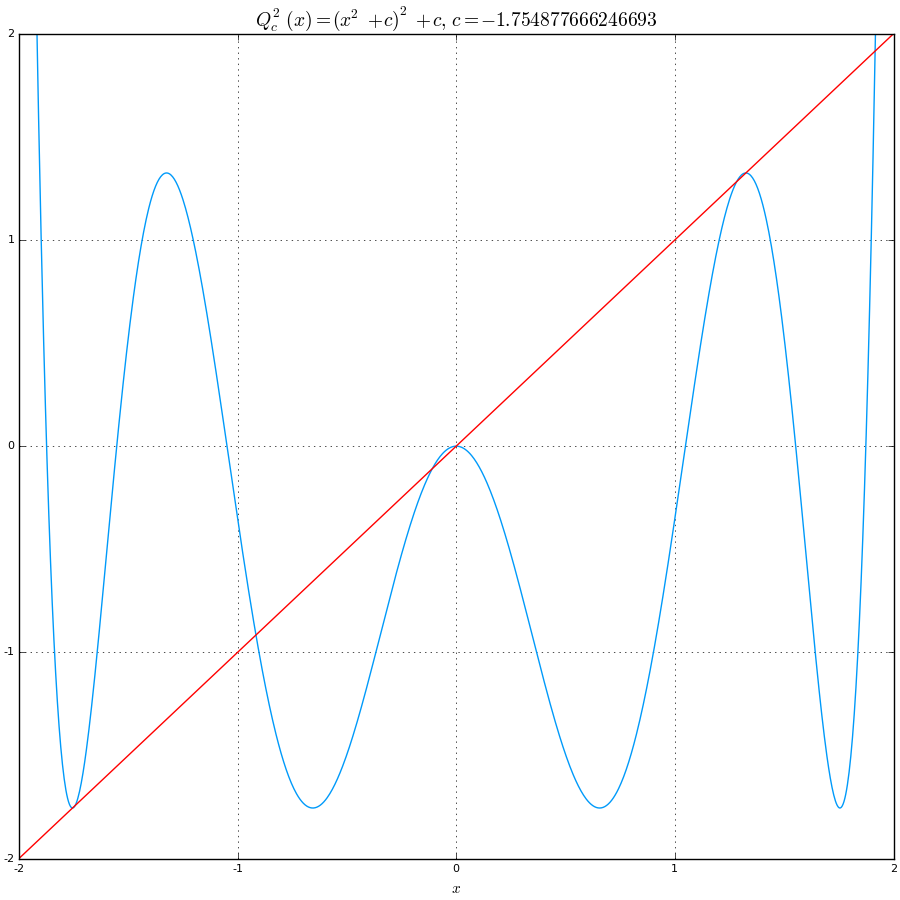

In [50]:
xrange=-2:1/2^8:2
Cn=-1.754877666246693
colors=[:purple,:royalblue,:green,:red,:gold,:pink]
    qc(x)=Qcⁿ(x,Cn,3)
    p=plot(xrange,qc,title=L"$Q_c^2(x)=(x^2+c)^2+c,\ c=-1.754877666246693$",label="",xlabel=L"x",
ylim=(-2,2),size=(900,900))
plot!(xrange,identity,label="",c=:red)
    

Encontremos los puntos fijos de este mapeo:

In [51]:
"""funcion que encuentra los puntos fijos de Qcⁿ(x,c,n)"""
function fixed_points(Cn,n,xrange)
    q(x)=Qcⁿ(x,Cn,n)-x
    roots=Float64[]
    for x in xrange
        root=roots_newton(q,x)
        if abs(root)<1e-10
            push!(roots,0.0)
            elseif isnan(root)
            nothing
        else
        push!(roots,root)
        end 
        roots=clean(sort(roots))
    end 
    return roots
end 

fixed_points (generic function with 1 method)

In [52]:
isnan(4)

false

In [53]:
xrange=-2:1/1000:2
roots3=fixed_points(Cn,3,xrange) #puntos fijos de Qcⁿ (n=3)
roots1=fixed_points(Cn,1,xrange) #puntos fijos del mapeo x^2+Cn

2-element Array{Float64,1}:
 -0.915937
  1.91594 

In [54]:
roots3

8-element Array{Float64,1}:
 -1.75488 
 -1.74285 
 -0.915937
 -0.10965 
  0.0     
  1.28266 
  1.32472 
  1.91594 

Para determinar la estabilidad o inestabilidad  estos puntos necesitamos evaluar la derivada del mapeo $Q_{Cn}^3(x)$ y evaluarla en estos puntos. Para ello usemos diferenciación automática con el paquete TaylorSeries:

In [55]:
function Qcⁿ´(x,Cn)
    t = Taylor1(1)
    qc(x)=Qcⁿ(x,Cn,3)
    fT = qc(x+t)
    return fT.coeffs[2]
   
end

Qcⁿ´ (generic function with 1 method)

In [56]:
for r in roots3
    stab=Qcⁿ´(r,Cn)
    if abs(stab)<1e-10
        stab=0
    end 
    println(stab,"  fixed point= $r")
end 

0  fixed point= -1.754877666246693
1.9609786700264553  fixed point= -1.7428545378333946
-6.147334359133521  fixed point= -0.9159370276416579
1.9609786700265024  fixed point= -0.10965002696442372
0  fixed point= 0.0
1.9609786700264744  fixed point= 1.282664273799762
0  fixed point= 1.3247179572447463
56.264398349054154  fixed point= 1.9159370276416579


Por tanto los puntos de la órbita de periodo 3 **estables** son 

$$x_{stab_1}^*=-1.754 \ 877 \ 666 \ 246 \ 693$$

$$x_{stab_2}^*=0.0$$

$$x_{stab_3}^*=1.324 \ 717 \ 957 \ 244 \ 7463$$

Y **los inestables** son:
$$x_{UNstab_1}^*=-1.742 \ 854 \ 537 \ 833 \ 3946$$

$$x_{UNstab_2}^*=-0.109 \ 650 \ 026 \ 964 \ 423 \ 72$$

$$x_{UNstab_3}^*=1.282 \ 664 \ 273 \ 799 \ 762$$


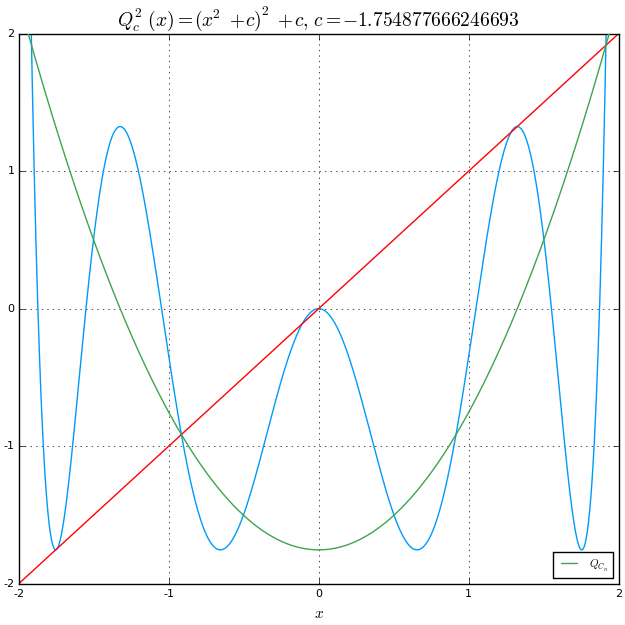

In [57]:
xrange=-2:1/2^8:2
Cn=-1.754877666246693
colors=[:purple,:royalblue,:green,:red,:gold,:pink]
    qc(x)=Qcⁿ(x,Cn,3)
    p=plot(xrange,qc,title=L"$Q_c^2(x)=(x^2+c)^2+c,\ c=-1.754877666246693$",label="",xlabel=L"x",
ylim=(-2,2),size=(625,625))
plot!(xrange,identity,label="",c=:red)
plot!(xrange,x->Qcⁿ(x, Cn, 1),label=L"Q_{C_n}")
    

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

In [58]:
γ=-1.7428545378333946
β=-0.10965002696442372
α=1.282664273799762;

Resolvamos con el método de Newton las ecuaciones

$Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$



In [59]:
qc(x)=Qcⁿ(x,Cn,3)
q1(x)=Qcⁿ(x,Cn,1)
aux1(x)=qc(x)-γ
aux2(x)=qc(x)-β
aux3(x)=qc(x)-α

aux3 (generic function with 1 method)

In [60]:
γgorro=roots_newton(aux1,-0.6)

-0.6240196892911

In [61]:
proof1=qc(γgorro) #α=-1.7428545378333946

-1.7428545378333946

$$\Rightarrow \ \hat\gamma=-0.6240196892911$$ 

y así

$$[\hat\gamma,\gamma]=[-1.7428...,-0.6240...]$$

Veamos que sucede con un punto que está dentro de este intervalo:


In [62]:
iter_map(x->Qc(x,Cn),-1.5, 100) 

101-element Array{Float64,1}:
 -1.5     
  0.495122
 -1.50973 
  0.524412
 -1.47987 
  0.435138
 -1.56553 
  0.696015
 -1.27044 
 -0.140859
 -1.73504 
  1.25547 
 -0.178663
  ⋮       
  0.0     
 -1.75488 
  1.32472 
  0.0     
 -1.75488 
  1.32472 
  0.0     
 -1.75488 
  1.32472 
  0.0     
 -1.75488 
  1.32472 

**Como podemos ver este punto, eventualmente se ve  atraído a la órbita de periodo estable**

In [63]:
βgorro=roots_newton(aux2,0.5)

0.10965002696442272

In [64]:
proof2=qc(βgorro) #β

-0.10965002696442205

$$\Rightarrow \ \hat\beta=1.0332956111131295$$ 

y así

$$[\beta,\hat\beta]=[-0.1096...,0.1096...]$$

Para un punto en este intervalo se tiene:

In [65]:
iter_map(x->Qc(x,Cn),0., 100) 

101-element Array{Float64,1}:
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
  ⋮      
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488
  1.32472
  0.0    
 -1.75488

Nuevamente aquí vemos cómo este punto, **eventualmente se ve  atraído a la órbita de periodo estable**

In [66]:
αgorro=roots_newton(aux3,1.5) #α

1.3654770936237324

In [67]:
proof3=qc(αgorro)

1.282664273799762

In [68]:
α

1.282664273799762

$$\Rightarrow \ \hat\alpha=1.3654770936237324$$ 

y así

 $$[\alpha,\hat\alpha]=[1.2826..,1.3654...]$$

Aquí se tiene:

In [69]:
iter_map(x->Qc(x,Cn),-1.31, 100) 

101-element Array{Float64,1}:
 -1.31      
 -0.0387777 
 -1.75337   
  1.31944   
 -0.013949  
 -1.75468   
  1.32404   
 -0.00180875
 -1.75487   
  1.32471   
 -3.04217e-5
 -1.75488   
  1.32472   
  ⋮         
 -1.75488   
  1.32472   
  0.0       
 -1.75488   
  1.32472   
  0.0       
 -1.75488   
  1.32472   
  0.0       
 -1.75488   
  1.32472   
  0.0       

De nuevo vemos cómo los puntos de este intervalo se ven atraídos a la órbita de periodo estable

**Si se hace esto para cualquier punto dentro de los intervalos definidos se tiene que todos se van a las órbitas de periodo estable.**

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

In [70]:
len0=α-βgorro
I0=βgorro:len0/1000:α

0.10965002696442272:0.0011730142468353393:1.282664273799762

In [71]:
len1=β-γ
I1=γ:len1/1000:β

-1.7428545378333946:0.0016332045108689707:-0.10965002696442383

In [72]:
QcI0=Float64[] 
QcI1=Float64[]
[push!(QcI0,qc(x)) for x in I0]
[push!(QcI1,qc(x)) for x in I1];

'QcI0' es el arreglo que representa a $Q_c(I_o)$  con $I_0=[0.1096...,1.2826...]$

'QcI1' es el arreglo que representa a $Q_c(I_1)$  con $I_1=[-1.7428...,-0.1096..]$

Como el mapeo cuadrático es una función continua, sabemos que manda intervalos cerrados en intervalos cerrados, por lo que simplemente estudiemos los extremos de las imágenes $Q_c(I_o)$ y $Q_c(I_1)$

In [73]:
min(QcI0...),max(QcI0...)

(-1.7548756449050802,1.282664273799762)

Por lo tanto vemos que **en efecto se satisface $I_1\subset Q_c(I_0)=[-1.7548...,1.2826...]$**

In [74]:
min(QcI1...),max(QcI1...)

(-1.7548713152098652,1.3247179249128131)

por lo tanto $I_1 \cup I_0=[-1.7428...,-0.1096..]\cup [0.1096...,1.2826...]  \subset Q_c(I_1)=[-1.7548...,1.3247...] $